# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurya Fahru Rosyidin
- **Email:** nurya.fahrurosyidin@gmail.com
- **ID Dicoding:** nuryafahrurosyidin

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren total order dan total revenue (pendapatan) perusahaan setiap bulannya selama tahun terakhir yang tersedia dalam data?
- Pertanyaan 2 : Berapa rata-rata skor ulasan pelanggan untuk setiap kategori produk, dan kategori mana yang memiliki tingkat kepuasan terendah?
- Pertanyaan 3 : Di negara bagian mana pelanggan terbanyak berada, dan apakah wilayah tersebut berkontribusi paling besar terhadap total penjualan?
- Pertanyaan 4 : 10 kategori produk apa yang menghasilkan nilai transaksi tertinggi dan apakah kategori tersebut juga merupakan kategori dengan jumlah item terjual terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### 1. Customers Dataset

In [2]:
customers_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### 2. Geolocation Dataset

In [3]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### 3. Order Items Dataset

In [4]:
order_items_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### 4. Order Payments Dataset

In [5]:
order_payments_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### 5. Order Reviews Dataset

In [6]:
order_reviews_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### 6. Orders Dataset

In [7]:
orders_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### 7. Product Category Name Translation Dataset

In [8]:
product_category_name_translation_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### 8. Products Dataset

In [9]:
products_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### 9. Sellers Dataset

In [10]:
sellers_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dataset/data_dicoding_e-commerce/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### nama-nama variabel yang digunakan untuk menyimpan dataset:
1. customers_df : dataset customers
2. geolocation_df : dataset geolocation
3. order_items_df : dataset order items
4. order_payments_df : dataset order payments
5. order_reviews_df : dataset order reviews
6. orders_df : dataset orders
7. product_category_name_translation_df : dataset product category name translation
8. products_df : dataset products
9. sellers_df : dataset sellers

Juga rincian isi dari dataset:
1. customers_dataset.csv berisi customer_id,"customer_unique_id","customer_zip_code_prefix","customer_city","customer_state"

2. geolocation_dataset.csv berisi geolocation_zip_code_prefix,"geolocation_lat","geolocation_lng","geolocation_city","geolocation_state"

3. order_items_dataset.csv berisi order_id,"order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"

4. order_payments_dataset.csv berisi order_id,"payment_sequential","payment_type","payment_installments","payment_value"

5. order_reviews_dataset.csv berisi review_id,"order_id","review_score","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"

6. orders_dataset.csv berisi order_id,"customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"

7. product_category_name_translation.csv berisi product_category_name,product_category_name_english

8. products_dataset.csv berisi product_id,"product_category_name","product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"

9. sellers_dataset.csv berisi seller_id,"seller_zip_code_prefix","seller_city","seller_state"

### Assessing Data

#### 1. Menilai tabel `customers_df`

In [11]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
customers_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
# Cek missing value
print("Cek Missing Value")
customers_df.isna().sum()

Cek Missing Value


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [13]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", customers_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [14]:
# Cek inaccurate value
print("Cek Inaccurate Value")
customers_df.describe()

Cek Inaccurate Value


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### 2. Menilai tabel `geolocation_df`

In [15]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
geolocation_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
# Cek missing value
print("Cek Missing Value")
geolocation_df.isna().sum()

Cek Missing Value


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [17]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", geolocation_df.duplicated().sum())

Cek Jumlah Duplikat:  261831


In [18]:
# Cek inaccurate value
print("Cek Inaccurate Value")
geolocation_df.describe()

Cek Inaccurate Value


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### 3. Menilai tabel `order_items_df`

In [19]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
order_items_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
# Cek missing value
print("Cek Missing Value")
order_items_df.isna().sum()

Cek Missing Value


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [21]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", order_items_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [22]:
# Cek inaccurate value
print("Cek Inaccurate Value")
order_items_df.describe()

Cek Inaccurate Value


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### 4. Menilai tabel `order_payments_df`

In [23]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
order_payments_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
# Cek missing value
print("Cek Missing Value")
order_payments_df.isna().sum()

Cek Missing Value


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [25]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", order_payments_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [26]:
# Cek inaccurate value
print("Cek Inaccurate Value")
order_payments_df.describe()

Cek Inaccurate Value


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### 5. Menilai tabel  `order_reviews_df`

In [27]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
order_reviews_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
# Cek missing value
print("Cek Missing Value")
order_reviews_df.isna().sum()

Cek Missing Value


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [29]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", order_reviews_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [30]:
# Cek inaccurate value
print("Cek Inaccurate Value")
order_reviews_df.describe()

Cek Inaccurate Value


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### 6. Menilai tabel `orders_df`

In [31]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
orders_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
# Cek missing value
print("Cek Missing Value")
orders_df.isna().sum()

Cek Missing Value


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [33]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", orders_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [34]:
# Cek inaccurate value
print("Cek Inaccurate Value")
orders_df.describe()

Cek Inaccurate Value


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### 7. Menilai tabel `product_category_name_translation_df`

In [35]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
product_category_name_translation_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
# Cek missing value
print("Cek Missing Value")
product_category_name_translation_df.isna().sum()

Cek Missing Value


,0
product_category_name,0
product_category_name_english,0


In [37]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", product_category_name_translation_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [38]:
# Cek inaccurate value
print("Cek Inaccurate Value")
product_category_name_translation_df.describe()

Cek Inaccurate Value


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### 8. Menilai tabel `products_df`

In [39]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
products_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
# Cek missing value
print("Cek Missing Value")
products_df.isna().sum()

Cek Missing Value


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [41]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", products_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [42]:
# Cek inaccurate value
print("Cek Inaccurate Value")
products_df.describe()

Cek Inaccurate Value


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### 9. Menilai tabel `sellers_df`

In [43]:
# Cek tipe data
print("Cek Informasi dan Tipe Data")
sellers_df.info()

Cek Informasi dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
# Cek missing value
print("Cek Missing Value")
sellers_df.isna().sum()

Cek Missing Value


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [45]:
# Cek jumlah duplikat
print("Cek Jumlah Duplikat: ", sellers_df.duplicated().sum())

Cek Jumlah Duplikat:  0


In [46]:
# Cek inaccurate value
print("Cek Inaccurate Value")
sellers_df.describe()

Cek Inaccurate Value


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Berikut ini adalah tabel dari Assessing Data pada dataset.

|   | Tipe Data | Missing Value | Duplicate Data | Inaccurate Value |
| --- | --- | --- | --- | --- |
| 1. customers_df | - | - | - | - |
| 2. geolocation_df | - | - | Terdapat 261831 data yang duplikat | - |
| 3. order_items_df | Terdapat kesalahan tipe data untuk kolom shipping_limit_date | - | - | - |
| 4. order_payments_df | - | - | - | - |
| 5. order_reviews_df | Terdapat kesalahan tipe data untuk kolom review_creation_date dan review_answer_timestamp | Terdapat missing value pada kolom review_comment_title dan review_comment_message | - | - |
| 6. orders_df | Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date | Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date | - | - |
| 7. product_category_name_translation_df | - | - | - | - |
| 8. products_df | - | Terdapat banyak kolom yang missing value | - | - |
| 9. sellers_df | - | - | - | - |

### Cleaning Data

#### 1. Membersihkan tabel `geolocation_df`

##### Duplicate Data

In [47]:
geolocation_df.duplicated().sum()

np.int64(261831)

In [48]:
geolocation_df.drop_duplicates(inplace=True)

In [49]:
print("Cek Jumlah Duplikat: ", geolocation_df.duplicated().sum())

Cek Jumlah Duplikat:  0


#### 2. Membersihkan tabel `order_items_df`

##### Memperbaiki tipe data

In [50]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [51]:
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [52]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### 3. Membersihkan tabel `order_reviews_df`

##### Memperbaiki tipe data

In [53]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [54]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [55]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### Memperbaiki missing value

In [56]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [57]:
order_reviews_df[order_reviews_df["review_comment_title"].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [58]:
order_reviews_df[order_reviews_df["review_comment_message"].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


In [59]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna("-")
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna("-")

In [60]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,-,-,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,-,-,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,-,-,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,-,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,-,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,-,-,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,-,-,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,-,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,-,-,2018-07-01,2018-07-02 12:59:13


In [61]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


#### 4. Membersihkan tabel `orders_df`

##### Memperbaiki tipe data

In [62]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [63]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [64]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


##### Memperbaiki missing value

In [65]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [66]:
orders_df[orders_df["order_approved_at"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaT,NaT,2018-10-01


In [67]:
orders_df[orders_df["order_delivered_carrier_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [68]:
orders_df[orders_df["order_delivered_customer_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [69]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna("-")
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna("-")
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna("-")

In [70]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [71]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### 5. Membersihkan tabel `products_df`

##### Memperbaiki missing value

In [72]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [73]:
products_df[products_df["product_category_name"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [74]:
products_df[products_df["product_name_lenght"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [75]:
products_df[products_df["product_description_lenght"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [76]:
products_df[products_df["product_photos_qty"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [77]:
products_df[products_df["product_weight_g"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
products_df[products_df["product_length_cm"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
products_df[products_df["product_height_cm"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
products_df[products_df["product_width_cm"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
products_df['product_category_name'] = products_df['product_category_name'].fillna("-")
products_df.dropna(subset=['product_name_lenght'], inplace=True)
products_df.dropna(subset=['product_description_lenght'], inplace=True)
products_df.dropna(subset=['product_photos_qty'], inplace=True)
products_df.dropna(subset=['product_weight_g'], inplace=True)
products_df.dropna(subset=['product_length_cm'], inplace=True)
products_df.dropna(subset=['product_height_cm'], inplace=True)
products_df.dropna(subset=['product_width_cm'], inplace=True)

In [82]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [83]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Berikut ini adalah tabel dari Cleaning Data pada dataset yang sudah dilakukan.

|   | Tipe Data | Missing Value | Duplicate Data | Inaccurate Value |
| --- | --- | --- | --- | --- |
| 1. customers_df | - | - | - | - |
| 2. geolocation_df (Sudah Clear) | - | - | Terdapat 261831 data yang duplikat | - |
| 3. order_items_df (Sudah Clear) | Terdapat kesalahan tipe data untuk kolom shipping_limit_date | - | - | - |
| 4. order_payments_df | - | - | - | - |
| 5. order_reviews_df (Sudah Clear) | Terdapat kesalahan tipe data untuk kolom review_creation_date dan review_answer_timestamp | Terdapat missing value pada kolom review_comment_title dan review_comment_message | - | - |
| 6. orders_df (Sudah Clear) | Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date | Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date | - | - |
| 7. product_category_name_translation_df | - | - | - | - |
| 8. products_df (Sudah Clear) | - | Terdapat banyak kolom yang missing value | - | - |
| 9. sellers_df | - | - | - | - |

## Exploratory Data Analysis (EDA)

Berikut adalah pertanyaan-pertanyaan bisnis yang sudah dibuat sebelumnya:
- Pertanyaan 1 : Bagaimana tren total order dan total revenue (pendapatan) perusahaan setiap bulannya selama tahun terakhir yang tersedia dalam data?
- Pertanyaan 2 : Berapa rata-rata skor ulasan pelanggan untuk setiap kategori produk, dan kategori mana yang memiliki tingkat kepuasan terendah?
- Pertanyaan 3 : Di negara bagian mana pelanggan terbanyak berada, dan apakah wilayah tersebut berkontribusi paling besar terhadap total penjualan?
- Pertanyaan 4 : 10 kategori produk apa yang menghasilkan nilai transaksi tertinggi dan apakah kategori tersebut juga merupakan kategori dengan jumlah item terjual terbanyak?

### 1. Explore `customers_df`

In [84]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23908,21cf8b03074c935aa1de2d527371916f,f79fe58e24e35fe4c036e1fb462769de,37470,sao lourenco,MG
14958,d7aaa02e7771c80a8de58245f234924a,71e3779e4ed716505c58323df01a2dda,4455,sao paulo,SP
17591,98721c618b43935849baec57ffb8dda0,e5887c53081fedb7b6795f1ba14e08ff,7853,franco da rocha,SP
99286,54383e6aababa529019a76c722f0945c,970bfe197225f8054e683079d1a771da,12916,braganca paulista,SP
60203,17eeec12d0709f7095f937373f3e170f,1704162a4eda737168c9057559ec75a7,12237,sao jose dos campos,SP


In [85]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [86]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [87]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### 2. Explore `geolocation_df`

In [88]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
601772,35700,-19.463478,-44.242256,sete lagoas,MG
85480,4338,-23.668853,-46.648774,sao paulo,SP
615340,36415,-20.520512,-43.826250,congonhas,MG
423787,21060,-22.855605,-43.264410,rio de janeiro,RJ
739246,59900,-6.106826,-38.206645,pau dos ferros,RN


In [89]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [90]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

,geolocation_zip_code_prefix
geolocation_city,
sao paulo,3171
são paulo,3013
brasilia,496
brasília,406
rio de janeiro,404
...,...
guarda-mor,1
guarda dos ferreiros,1
guaraíta,1


In [91]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

,geolocation_zip_code_prefix
geolocation_state,
SP,6349
MG,1868
RJ,1390
RS,1132
PR,1046
BA,992
GO,773
SC,620
PE,596


### 3. Explore `order_items_df`

In [92]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
45339,6705f845a3ac46ab9725d0bd82338450,1,a334304f952399f2161225628a9d2891,d3f39f05462b79a4562d35893a28f159,2018-03-06 09:29:34,78.00,12.05
111224,fcafda6e35d67d0f529ae71fa9af530a,1,af82bdd672f63ec5fb84b31302e39506,1554a68530182680ad5c8b042c3ab563,2018-08-13 18:15:20,75.90,23.33
67495,9a50f016b349f16c4b2e42a4be02d1c3,1,6f1b3488c5314b527201978357a8d85f,240b9776d844d37535668549a396af32,2018-08-12 22:25:14,259.99,18.01
81025,b83760bff972adc010a180e5219f90f5,1,ccadfeab525a9eb1569983b66e5075c4,33576ec5412fb5905d876f12f33bfde6,2017-09-29 12:25:24,79.00,12.68
103920,ec042ef0cc05d098905c4383c70f9132,1,9234cd3c6bd121932ef77a39d6d87893,06e5eefc71ec47ae763c5c6f8db7064f,2018-06-28 17:31:46,289.99,9.61


In [93]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### 4. Explore `order_payments_df`

In [94]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
55629,d61e9236bd0abb5bf81b5c7f984c9d74,1,credit_card,3,39.51
8875,c2be1e0558f4f2932216d9b9f668d987,1,boleto,1,42.07
46814,dcef4484357754fc205095e165e01504,1,credit_card,1,137.73
44718,d53b0c7749144befd074083817d58880,1,credit_card,6,61.01
61828,32980a0c990d84e3f2c3e9838a4abc1d,1,credit_card,8,553.38


In [95]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [96]:
order_payments_df.groupby(by="payment_type").payment_value.sum().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


### 5. Explore `order_reviews_df`

In [97]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
53730,47764bd14ac41ef1272ccdc2f9903235,36536e349dc6c5be3197657bf27675da,5,Excelente,Tudo conforme combinado.,2018-05-18,2018-05-21 18:04:23
43070,88f090c623c76c102675bd7028d87819,f6352f413ce4e20f67354a9c6f5460e5,5,-,-,2017-05-20,2017-05-22 11:57:14
16384,10a56938fd5f906235493ae7c79393a6,1777f6d0dafb34a24cffac1c7ad5d618,4,-,Depois achei mais barato em outro site,2017-11-08,2017-11-13 13:44:05
66267,0146535aa17e2c650aa05fe21ddad611,8dbafac7422903530bd67f9cc974a094,5,Bom,Bom,2018-08-23,2018-08-25 20:43:27
81176,a9160e934f1e683b7e42a4d02369867d,96c31596f5df2ec1fc71f5849a903305,5,-,"Ótimo produto, recebido dentro do prazo, recom...",2017-09-11,2017-09-16 18:15:08


In [98]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,-,-,NaN,NaN
freq,3,3,NaN,87657,58250,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [99]:
order_reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


### 6. Explore `orders_df`

In [100]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
12807,1c8898140458c37fbbf0be37d47193b9,175dd7b2bfca46e0ff5cbca65b9c6e7b,delivered,2018-04-01 05:03:10,2018-04-01 05:15:16,2018-04-05 00:19:13,2018-04-26 22:16:26,2018-05-04
10579,3ccf90ae3753b3d692dd5f400621502e,11b8d5bca945346e1096f142d0e423e0,delivered,2018-04-04 20:44:11,2018-04-04 20:55:27,2018-04-05 18:50:38,2018-04-27 01:09:28,2018-05-03
75698,ef8e343c4abd7135c59d2a6179bd4351,e012c42980f243d89990940907be4fcb,delivered,2017-10-10 23:38:52,2017-10-11 00:03:48,2017-10-16 14:44:40,2017-10-25 19:06:18,2017-11-03
58013,f46a84975b5e1924b04413f4a87af6d5,404fc488aa0d7e35e8544b3f6210aa10,processing,2017-02-26 21:03:46,2017-02-26 21:15:08,-,-,2017-03-24
34746,724f1ffc2af7bb0275a9c981cb21909a,322f36046dd936288a20347c181996df,delivered,2017-06-26 08:33:16,2017-06-26 10:33:19,2017-06-27 14:46:43,2017-07-20 19:36:31,2017-07-28


In [101]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,90734,81019,95665,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,-,-,-,NaN
freq,1,1,96478,NaN,160,1783,2965,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,NaN,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,NaN,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,NaN,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,NaN,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,2018-11-12 00:00:00


In [102]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### 7. Explore `product_category_name_translation_df`

In [103]:
product_category_name_translation_df.sample(5)

,product_category_name,product_category_name_english
51,fashion_esporte,fashion_sport
38,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
34,artigos_de_festas,party_supplies
70,seguros_e_servicos,security_and_services
13,tablets_impressao_imagem,tablets_printing_image


In [104]:
product_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 8. Explore `products_df`

In [105]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
19433,aa050bcc1f43af01b044c36285bbb87c,construcao_ferramentas_construcao,57.0,1519.0,2.0,450.0,28.0,4.0,13.0
5730,02ad78835ec3f72e750d1dfa6a7e11b3,moveis_decoracao,38.0,1303.0,2.0,1250.0,52.0,7.0,11.0
11556,47a465cc5e0ae0b5cfa55a76909639a3,esporte_lazer,49.0,499.0,4.0,525.0,17.0,14.0,16.0
22422,695c34c5771cca25ecdc04d24a9b49f6,moveis_decoracao,50.0,676.0,2.0,1750.0,35.0,23.0,35.0
10330,73a1c27772beb35c2b0caf9a809570f8,automotivo,58.0,217.0,2.0,150.0,25.0,15.0,15.0


In [106]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### 9. Explore `sellers_df`

In [107]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
184,aaed1309374718fdd995ee4c58c9dfcd,89120,timbo,SC
1649,d79e8478eed9999493990b44955fb22e,20081,rio de janeiro / rio de janeiro,RJ
118,3d3ccf2b2f8134b10dce9dd446f0e075,14940,ibitinga,SP
2794,1660ad786c27fd935378b6192a90b417,9891,sao bernardo do campo,SP
1364,6338ea67c41078a46ad99cc009654956,95170,farroupilha,RS


In [108]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [109]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
aguas claras df,1
ao bernardo do campo,1
angra dos reis rj,1


In [110]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### Menjawab pertanyaan

### Pertanyaan 1 : Bagaimana tren total order dan total revenue (pendapatan) perusahaan setiap bulannya selama tahun terakhir yang tersedia dalam data?

#### Explore `orders_df` dan `order_items_df`

##### Menggabungkan `orders_df` dan `order_items_df`

In [111]:
order_revenue_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    on="order_id"
)
order_revenue_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [112]:
order_revenue_df['order_month'] = order_revenue_df['order_purchase_timestamp'].dt.to_period('M')
order_revenue_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018-02


In [113]:
monthly_revenue_df = order_revenue_df.groupby(by="order_month").agg({
    "order_id": "nunique",
    "price": "sum"
}).reset_index()
monthly_revenue_df

,order_month,order_id,price
0,2016-09,3,267.36
1,2016-10,308,49507.66
2,2016-12,1,10.90
3,2017-01,789,120312.87
4,2017-02,1733,247303.02
5,2017-03,2641,374344.30
6,2017-04,2391,359927.23
7,2017-05,3660,506071.14
8,2017-06,3217,433038.60
9,2017-07,3969,498031.48


In [114]:
monthly_revenue_df.rename(columns={
    "order_id" : "total_orders",
    "price" : "total_revenue"
}, inplace=True)
monthly_revenue_df

,order_month,total_orders,total_revenue
0,2016-09,3,267.36
1,2016-10,308,49507.66
2,2016-12,1,10.90
3,2017-01,789,120312.87
4,2017-02,1733,247303.02
5,2017-03,2641,374344.30
6,2017-04,2391,359927.23
7,2017-05,3660,506071.14
8,2017-06,3217,433038.60
9,2017-07,3969,498031.48


In [115]:
last_date = order_revenue_df["order_purchase_timestamp"].max()
start_date = last_date - pd.DateOffset(months=12)
monthly_revenue_last_year = monthly_revenue_df[monthly_revenue_df['order_month'] >= start_date.to_period('M')]
print(monthly_revenue_last_year)

   order_month  total_orders  total_revenue
11     2017-09          4243      624401.69
12     2017-10          4568      664219.43
13     2017-11          7451     1010271.37
14     2017-12          5624      743914.17
15     2018-01          7220      950030.36
16     2018-02          6694      844178.71
17     2018-03          7188      983213.44
18     2018-04          6934      996647.75
19     2018-05          6853      996517.68
20     2018-06          6160      865124.31
21     2018-07          6273      895507.22
22     2018-08          6452      854686.33
23     2018-09             1         145.00


### Pertanyaan 2 : Berapa rata-rata skor ulasan pelanggan untuk setiap kategori produk, dan kategori mana yang memiliki tingkat kepuasan terendah?

#### Explore `order_reviews_df`, `order_items_df`, `products_df`, dan `product_category_name_translation_df`

##### Menggabungkan `order_reviews_df`, `order_items_df`, `products_df`, dan `product_category_name_translation_df`

In [116]:
items_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id"
)
items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [117]:
product_review_df = pd.merge(
    left=items_product_df,
    right=order_reviews_df,
    how="left",
    on="order_id"
)
product_review_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,-,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30000.0,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4.0,-,-,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3050.0,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5.0,-,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,200.0,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4.0,-,-,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,3750.0,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5.0,-,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [118]:
final_product_review_df = pd.merge(
    left=product_review_df,
    right=product_category_name_translation_df,
    how="left",
    on="product_category_name"
)
final_product_review_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,-,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4.0,-,-,2017-05-13,2017-05-15 11:34:13,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5.0,-,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4.0,-,-,2018-08-15,2018-08-15 16:39:01,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5.0,-,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,garden_tools


In [119]:
category_review_stats = final_product_review_df.groupby(by="product_category_name_english").agg({
    "review_score": "mean",
    "order_id": "count"
}).reset_index()
category_review_stats

,product_category_name_english,review_score,order_id
0,agro_industry_and_commerce,4.000000,212
1,air_conditioning,3.969178,297
2,art,3.937198,209
3,arts_and_craftmanship,4.125000,24
4,audio,3.825485,365
...,...,...,...
66,stationery,4.193857,2525
67,tablets_printing_image,4.123457,83
68,telephony,3.946867,4550
69,toys,4.158641,4125


In [120]:
category_review_stats = category_review_stats.sort_values(by="review_score", ascending=True)
print(category_review_stats.head(10))

        product_category_name_english  review_score  order_id
61              security_and_services      2.500000         2
23                diapers_and_hygiene      3.256410        39
57                   office_furniture      3.493183      1701
46                     home_comfort_2      3.629630        30
30              fashion_male_clothing      3.641221       132
34                    fixed_telephony      3.683206       265
58                     party_supplies      3.767442        43
27             fashio_female_clothing      3.780000        50
41  furniture_mattress_and_upholstery      3.815789        38
4                               audio      3.825485       365


### Pertanyaan 3 : Di negara bagian mana pelanggan terbanyak berada, dan apakah wilayah tersebut berkontribusi paling besar terhadap total penjualan?

#### Explore `customers_df`, `order_items_df`, dan `orders_df`

In [121]:
print(customers_df.head())
print(customers_df['customer_state'].value_counts().head(10))

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype

In [122]:
print(orders_df[['order_id', 'customer_id']].head())

                           order_id                       customer_id
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c


##### Menggabungkan `customers_df`, `orders_df` dan `order_items_df`

In [123]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="inner",
    on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [124]:
customers_sales_df = pd.merge(
    left=customers_orders_df,
    right=order_items_df,
    how="inner",
    on="order_id"
)
customers_sales_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [125]:
state_analysis_df = customers_sales_df.groupby(by="customer_state").agg({
    "customer_unique_id": "nunique",
    "price": "sum"
}).reset_index()
state_analysis_df

,customer_state,customer_unique_id,price
0,AC,77,15982.95
1,AL,399,80314.81
2,AM,142,22356.84
3,AP,67,13474.30
4,BA,3257,511349.99
5,CE,1305,227254.71
6,DF,2062,302603.94
7,ES,1956,275037.31
8,GO,1942,294591.95
9,MA,719,119648.22


In [126]:
state_analysis_df = state_analysis_df.sort_values(by="customer_unique_id", ascending=False)
state_analysis_df

,customer_state,customer_unique_id,price
25,SP,39981,5202955.05
18,RJ,12303,1824092.67
10,MG,11178,1585308.03
22,RS,5249,750304.02
17,PR,4840,683083.76
23,SC,3513,520553.34
4,BA,3257,511349.99
6,DF,2062,302603.94
7,ES,1956,275037.31
8,GO,1942,294591.95


In [127]:
total_revenue_all = state_analysis_df["price"].sum()
state_analysis_df["revenue_percentage"] = (state_analysis_df["price"] / total_revenue_all) * 100
state_analysis_df

,customer_state,customer_unique_id,price,revenue_percentage
25,SP,39981,5202955.05,38.280543
18,RJ,12303,1824092.67,13.420692
10,MG,11178,1585308.03,11.663843
22,RS,5249,750304.02,5.520333
17,PR,4840,683083.76,5.025763
23,SC,3513,520553.34,3.829951
4,BA,3257,511349.99,3.762238
6,DF,2062,302603.94,2.226397
7,ES,1956,275037.31,2.023577
8,GO,1942,294591.95,2.167449


In [128]:
print(state_analysis_df.head(10))

   customer_state  customer_unique_id       price  revenue_percentage
25             SP               39981  5202955.05           38.280543
18             RJ               12303  1824092.67           13.420692
10             MG               11178  1585308.03           11.663843
22             RS                5249   750304.02            5.520333
17             PR                4840   683083.76            5.025763
23             SC                3513   520553.34            3.829951
4              BA                3257   511349.99            3.762238
6              DF                2062   302603.94            2.226397
7              ES                1956   275037.31            2.023577
8              GO                1942   294591.95            2.167449


### Pertanyaan 4 : 10 kategori produk apa yang menghasilkan nilai transaksi tertinggi dan apakah kategori tersebut juga merupakan kategori dengan jumlah item terjual terbanyak?

#### Explore `order_items_df`, `products_df`, dan `product_category_name_translation_df`

##### Menggabungkan `order_items_df`, `products_df`, dan `product_category_name_translation_df`

In [129]:
product_performance_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id"
)
product_performance_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [130]:
product_performance_df = pd.merge(
    left=product_performance_df,
    right=product_category_name_translation_df,
    how="left",
    on="product_category_name"
)
product_performance_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [131]:
category_analysis = product_performance_df.groupby(by="product_category_name_english").agg({
    "price": "sum",
    "order_item_id": "count"
}).reset_index()
category_analysis

,product_category_name_english,price,order_item_id
0,agro_industry_and_commerce,72530.47,212
1,air_conditioning,55024.96,297
2,art,24202.64,209
3,arts_and_craftmanship,1814.01,24
4,audio,50688.50,364
...,...,...,...
66,stationery,230943.23,2517
67,tablets_printing_image,7528.41,83
68,telephony,323667.53,4545
69,toys,483946.60,4117


In [132]:
category_analysis.rename(columns={
    "price": "total_revenue",
    "order_item_id": "total_items_sold"
}, inplace=True)
category_analysis

,product_category_name_english,total_revenue,total_items_sold
0,agro_industry_and_commerce,72530.47,212
1,air_conditioning,55024.96,297
2,art,24202.64,209
3,arts_and_craftmanship,1814.01,24
4,audio,50688.50,364
...,...,...,...
66,stationery,230943.23,2517
67,tablets_printing_image,7528.41,83
68,telephony,323667.53,4545
69,toys,483946.60,4117


In [133]:
top_10_revenue = category_analysis.sort_values(by="total_revenue", ascending=False).head(10)
print("10 kategori produk yang menghasilkan nilai transaksi tertinggi:")
print(top_10_revenue)

10 kategori produk yang menghasilkan nilai transaksi tertinggi:
   product_category_name_english  total_revenue  total_items_sold
43                 health_beauty     1258681.34              9670
70                 watches_gifts     1205005.68              5991
7                 bed_bath_table     1036988.68             11115
65                sports_leisure      988048.97              8641
15         computers_accessories      911954.32              7827
39               furniture_decor      729762.49              8334
20                    cool_stuff      635290.85              3796
49                    housewares      632248.66              6964
5                           auto      592720.11              4235
42                  garden_tools      485256.46              4347


### Penggabungan semua dataset menjadi satu dataset

In [134]:
all_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    on="order_id"
)

all_df = pd.merge(
    left=all_df,
    right=order_payments_df,
    how="left",
    on="order_id"
)

all_df = pd.merge(
    left=all_df,
    right=order_reviews_df,
    how="left",
    on="order_id"
)

all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    on="customer_id"
)

all_df = pd.merge(
    left=all_df,
    right=products_df,
    how="left",
    on="product_id"
)

all_df = pd.merge(
    left=all_df,
    right=sellers_df,
    how="left",
    on="seller_id"
)

all_df = pd.merge(
    left=all_df,
    right=product_category_name_translation_df,
    how="left",
    on="product_category_name"
)

all_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1.0,060cb19345d90064d1015407193c233d,...,608.0,1.0,7150.0,65.0,10.0,65.0,7112.0,guarulhos,SP,auto
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,-,-,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,...,NaN,NaN,NaN,NaN,NaN,NaN,5455.0,sao paulo,SP,NaN
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,1.0,4520766ec412348b8d4caa5e8a18c464,...,956.0,1.0,50.0,16.0,16.0,17.0,12940.0,atibaia,SP,auto


In [135]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total order dan total revenue (pendapatan) perusahaan setiap bulannya selama tahun terakhir yang tersedia dalam data?

In [136]:
print(monthly_revenue_last_year)

   order_month  total_orders  total_revenue
11     2017-09          4243      624401.69
12     2017-10          4568      664219.43
13     2017-11          7451     1010271.37
14     2017-12          5624      743914.17
15     2018-01          7220      950030.36
16     2018-02          6694      844178.71
17     2018-03          7188      983213.44
18     2018-04          6934      996647.75
19     2018-05          6853      996517.68
20     2018-06          6160      865124.31
21     2018-07          6273      895507.22
22     2018-08          6452      854686.33
23     2018-09             1         145.00


/tmp/ipython-input-395/33130839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_revenue_last_year['order_month_str'] = monthly_revenue_last_year['order_month'].astype(str)


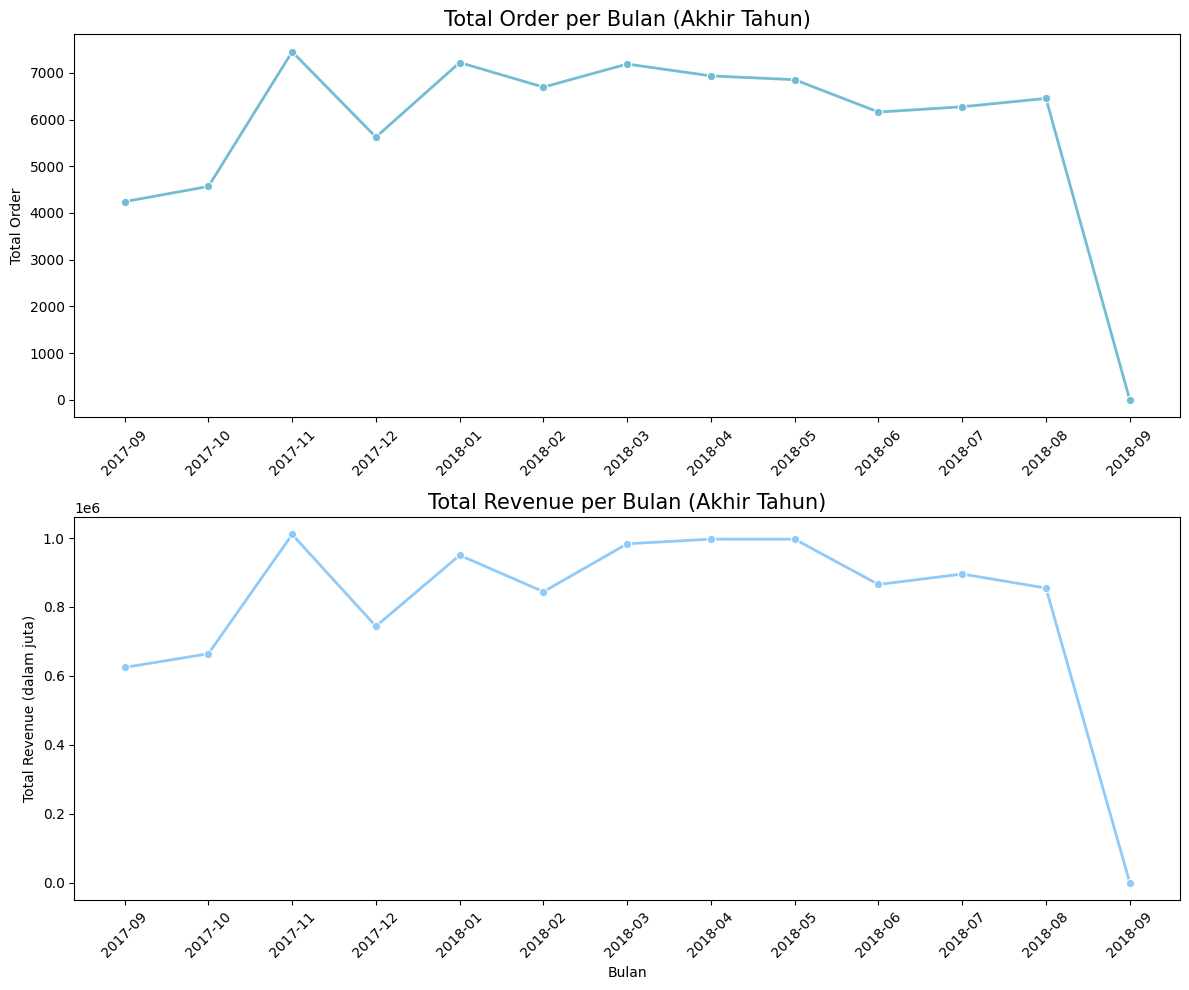

In [137]:
monthly_revenue_last_year['order_month_str'] = monthly_revenue_last_year['order_month'].astype(str)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Untuk plot total orders
sns.lineplot(
    x="order_month_str",
    y="total_orders",
    data=monthly_revenue_last_year,
    marker="o",
    linewidth=2,
    color="#72BCD4",
    ax=ax[0]
)
ax[0].set_title("Total Order per Bulan (Akhir Tahun)", loc="center", fontsize=15)
ax[0].set_ylabel("Total Order")
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', rotation=45)

#Untuk plot total revenue
sns.lineplot(
    x="order_month_str",
    y="total_revenue",
    data=monthly_revenue_last_year,
    marker="o",
    linewidth=2,
    color="#90CAF9",
    ax=ax[1]
)
ax[1].set_title("Total Revenue per Bulan (Akhir Tahun)", loc="center", fontsize=15)
ax[1].set_ylabel("Total Revenue (dalam juta)")
ax[1].set_xlabel("Bulan")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Berdasarkan pada visualisasi tersebut tersebut, performa perusahaan mencapai puncaknya pada bulan November tahun 2017 dengan `total_revenue` dan `total_order` tertinggi yang mengindikasikan keberhasilan strategi promosi (efek diskon hari besar). Jika pendapatan naik tajam di bulan tersebut, berarti strategi promosi musiman perusahaan sangat efektif.

### Pertanyaan 2: Berapa rata-rata skor ulasan pelanggan untuk setiap kategori produk, dan kategori mana yang memiliki tingkat kepuasan terendah?

In [138]:
print(category_review_stats)

   product_category_name_english  review_score  order_id
61         security_and_services      2.500000         2
23           diapers_and_hygiene      3.256410        39
57              office_furniture      3.493183      1701
46                home_comfort_2      3.629630        30
30         fashion_male_clothing      3.641221       132
..                           ...           ...       ...
35                       flowers      4.419355        33
22       costruction_tools_tools      4.444444       103
8         books_general_interest      4.446266       553
29     fashion_childrens_clothes      4.500000         8
11             cds_dvds_musicals      4.642857        14

[71 rows x 3 columns]


/tmp/ipython-input-395/840906746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


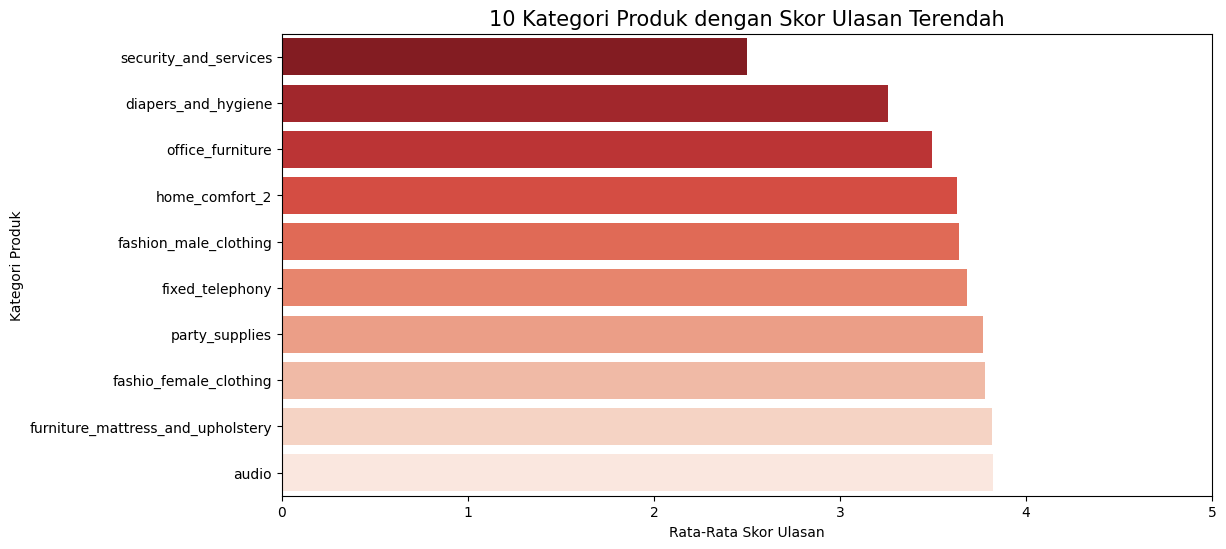

In [139]:
# 10 Product Categories with the Lowest Review Scores
low_score_categories = category_review_stats.sort_values(by="review_score", ascending=True).head(10)
# low_score_categories

plt.figure(figsize=(12, 6))
sns.barplot(
    x="review_score",
    y="product_category_name_english",
    data=low_score_categories,
    palette="Reds_r"
)

plt.title("10 Kategori Produk dengan Skor Ulasan Terendah", loc="center", fontsize=15)
plt.xlabel("Rata-Rata Skor Ulasan")
plt.ylabel("Kategori Produk")
plt.xlim(0, 5)
plt.show()

Berdasarkan dari hasil visualisasi berikut, kategori security_and_services memiliki tingkat kepuasan terendah dengan rata-rata skor hanya 2,5. Hal ini mungkin terjadi karena ada masalah pada kualitas barang atau keterlambatan pengiriman.

### Pertanyaan 3: Di negara bagian mana pelanggan terbanyak berada, dan apakah wilayah tersebut berkontribusi paling besar terhadap total penjualan?

In [140]:
print(state_analysis_df)

   customer_state  customer_unique_id       price  revenue_percentage
25             SP               39981  5202955.05           38.280543
18             RJ               12303  1824092.67           13.420692
10             MG               11178  1585308.03           11.663843
22             RS                5249   750304.02            5.520333
17             PR                4840   683083.76            5.025763
23             SC                3513   520553.34            3.829951
4              BA                3257   511349.99            3.762238
6              DF                2062   302603.94            2.226397
7              ES                1956   275037.31            2.023577
8              GO                1942   294591.95            2.167449
15             PE                1605   262788.03            1.933453
5              CE                1305   227254.71            1.672018
13             PA                 944   178947.81            1.316602
12             MT   

/tmp/ipython-input-395/733997733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-395/733997733.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


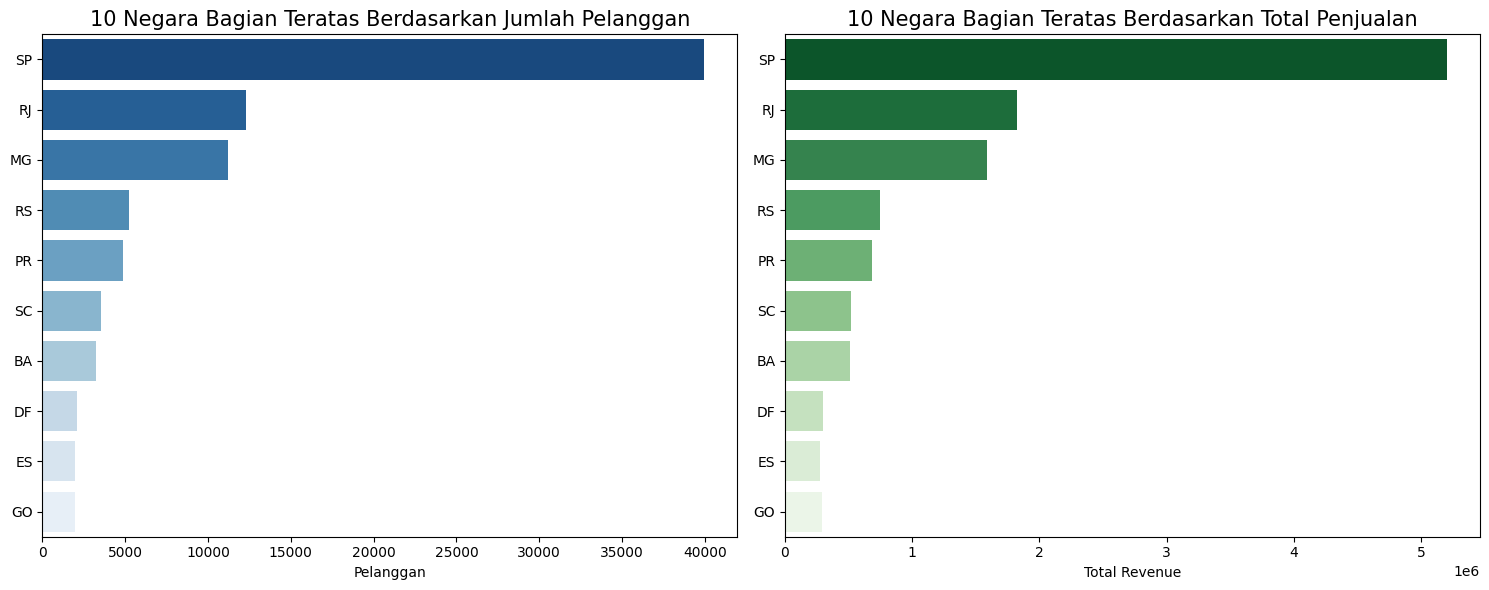

In [141]:
top_10_states = state_analysis_df.sort_values(by="customer_unique_id", ascending=False).head(10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Untuk plot jumlah pelanggan
sns.barplot(
    x="customer_unique_id",
    y="customer_state",
    data=top_10_states,
    palette="Blues_r",
    ax=ax[0]
)
ax[0].set_title("10 Negara Bagian Teratas Berdasarkan Jumlah Pelanggan", loc="center", fontsize=15)
ax[0].set_xlabel("Pelanggan")
ax[0].set_ylabel(None)

#Untuk total penjualan
sns.barplot(
    x="price",
    y="customer_state",
    data=top_10_states,
    palette="Greens_r",
    ax=ax[1]
)
ax[1].set_title("10 Negara Bagian Teratas Berdasarkan Total Penjualan", loc="center", fontsize=15)
ax[1].set_xlabel("Total Revenue")
ax[1].set_ylabel(None)

plt.tight_layout()
plt.show()

Berdasarkan dari hasil visualisasi berikut didapatkan bahwa SP (Sao Paulo) menjadi negara bagian yang mendapatkan jumlah pelanggan terbanyak yaitu 39.981 pelanggan dan juga wilayah yang berkontribusi besar terhadap total penjualan dengan 38,28% dari total revenue keseluruhan.

### Pertanyaan 4: 10 kategori produk apa yang menghasilkan nilai transaksi tertinggi dan apakah kategori tersebut juga merupakan kategori dengan jumlah item terjual terbanyak?

In [142]:
print(top_10_revenue)

   product_category_name_english  total_revenue  total_items_sold
43                 health_beauty     1258681.34              9670
70                 watches_gifts     1205005.68              5991
7                 bed_bath_table     1036988.68             11115
65                sports_leisure      988048.97              8641
15         computers_accessories      911954.32              7827
39               furniture_decor      729762.49              8334
20                    cool_stuff      635290.85              3796
49                    housewares      632248.66              6964
5                           auto      592720.11              4235
42                  garden_tools      485256.46              4347


/tmp/ipython-input-395/3886023300.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-395/3886023300.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


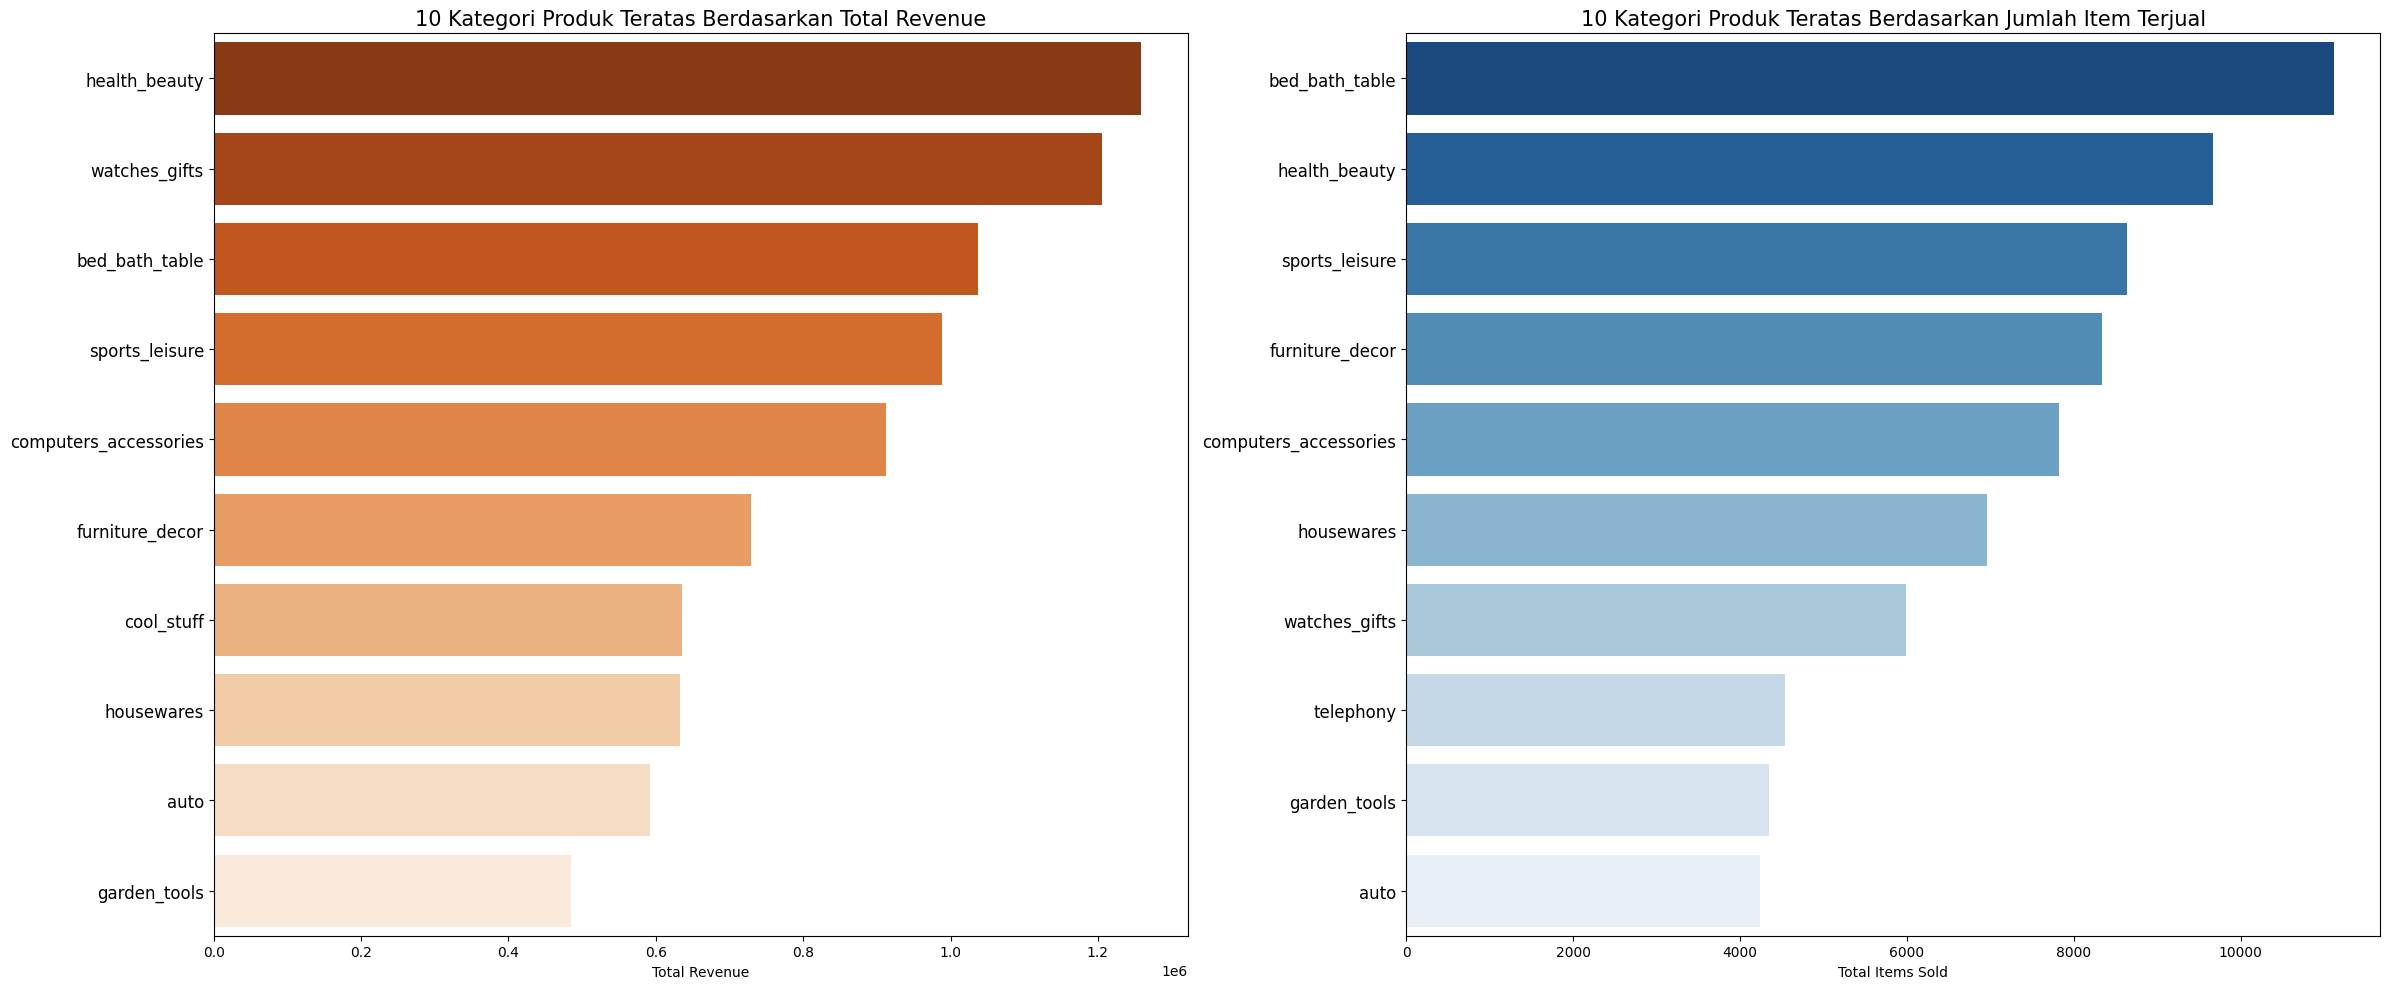

In [143]:
top_10_revenue = category_analysis.sort_values(by="total_revenue", ascending=False).head(10)
top_10_volume = category_analysis.sort_values(by="total_items_sold", ascending=False).head(10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

#Untuk total revenue
sns.barplot(
    x="total_revenue",
    y="product_category_name_english",
    data=top_10_revenue,
    palette="Oranges_r",
    ax=ax[0]
)
ax[0].set_title("10 Kategori Produk Teratas Berdasarkan Total Revenue", loc="center", fontsize=15)
ax[0].set_xlabel("Total Revenue")
ax[0].set_ylabel(None)
ax[0].tick_params(axis='y', labelsize=12)

#Untuk total items sold
sns.barplot(
    x="total_items_sold",
    y="product_category_name_english",
    data=top_10_volume,
    palette="Blues_r",
    ax=ax[1]
)
ax[1].set_title("10 Kategori Produk Teratas Berdasarkan Jumlah Item Terjual", loc="center", fontsize=15)
ax[1].set_xlabel("Total Items Sold")
ax[1].set_ylabel(None)
ax[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

Berdasarkan dari hasil visualisasi berikut didapatkan 10 kategori produk teratas. Untuk kategori health_beauty mendapatkan nilai transaksi tertinggi dengan nilai 1.258681,34, namun kategori bed_bath_table justru mendapat jumlah item terjual terbanyak yaitu 11.115 item meskipun berada di peringkat ketiga dalam nilai transaksi.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [144]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

snapshot_date = all_df['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

rfm_df = all_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']

print("Hasil RFM Analysis")
print(rfm_df)

Hasil RFM Analysis
                            customer_id  recency  frequency  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2      161          1    129.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     18.90
2      0000f46a3911fa3c0805444483337064      586          1     69.00
3      0000f6ccb0745a6a4b88665a16c9f078      370          1     25.99
4      0004aac84e0df4da2b147fca70cf8255      337          1    180.00
...                                 ...      ...        ...       ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684      496          1   1570.00
96092  fffea47cd6d3cc0a88bd621562a9d061      311          1     64.89
96093  ffff371b4d645b6ecea244b27531430a      618          1     89.90
96094  ffff5962728ec6157033ef9805bacc48      169          1    115.00
96095  ffffd2657e2aad2907e67c3e9daecbeb      533          1     56.99

[96096 rows x 4 columns]


/tmp/ipython-input-395/1034430871.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-395/1034430871.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-395/1034430871.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


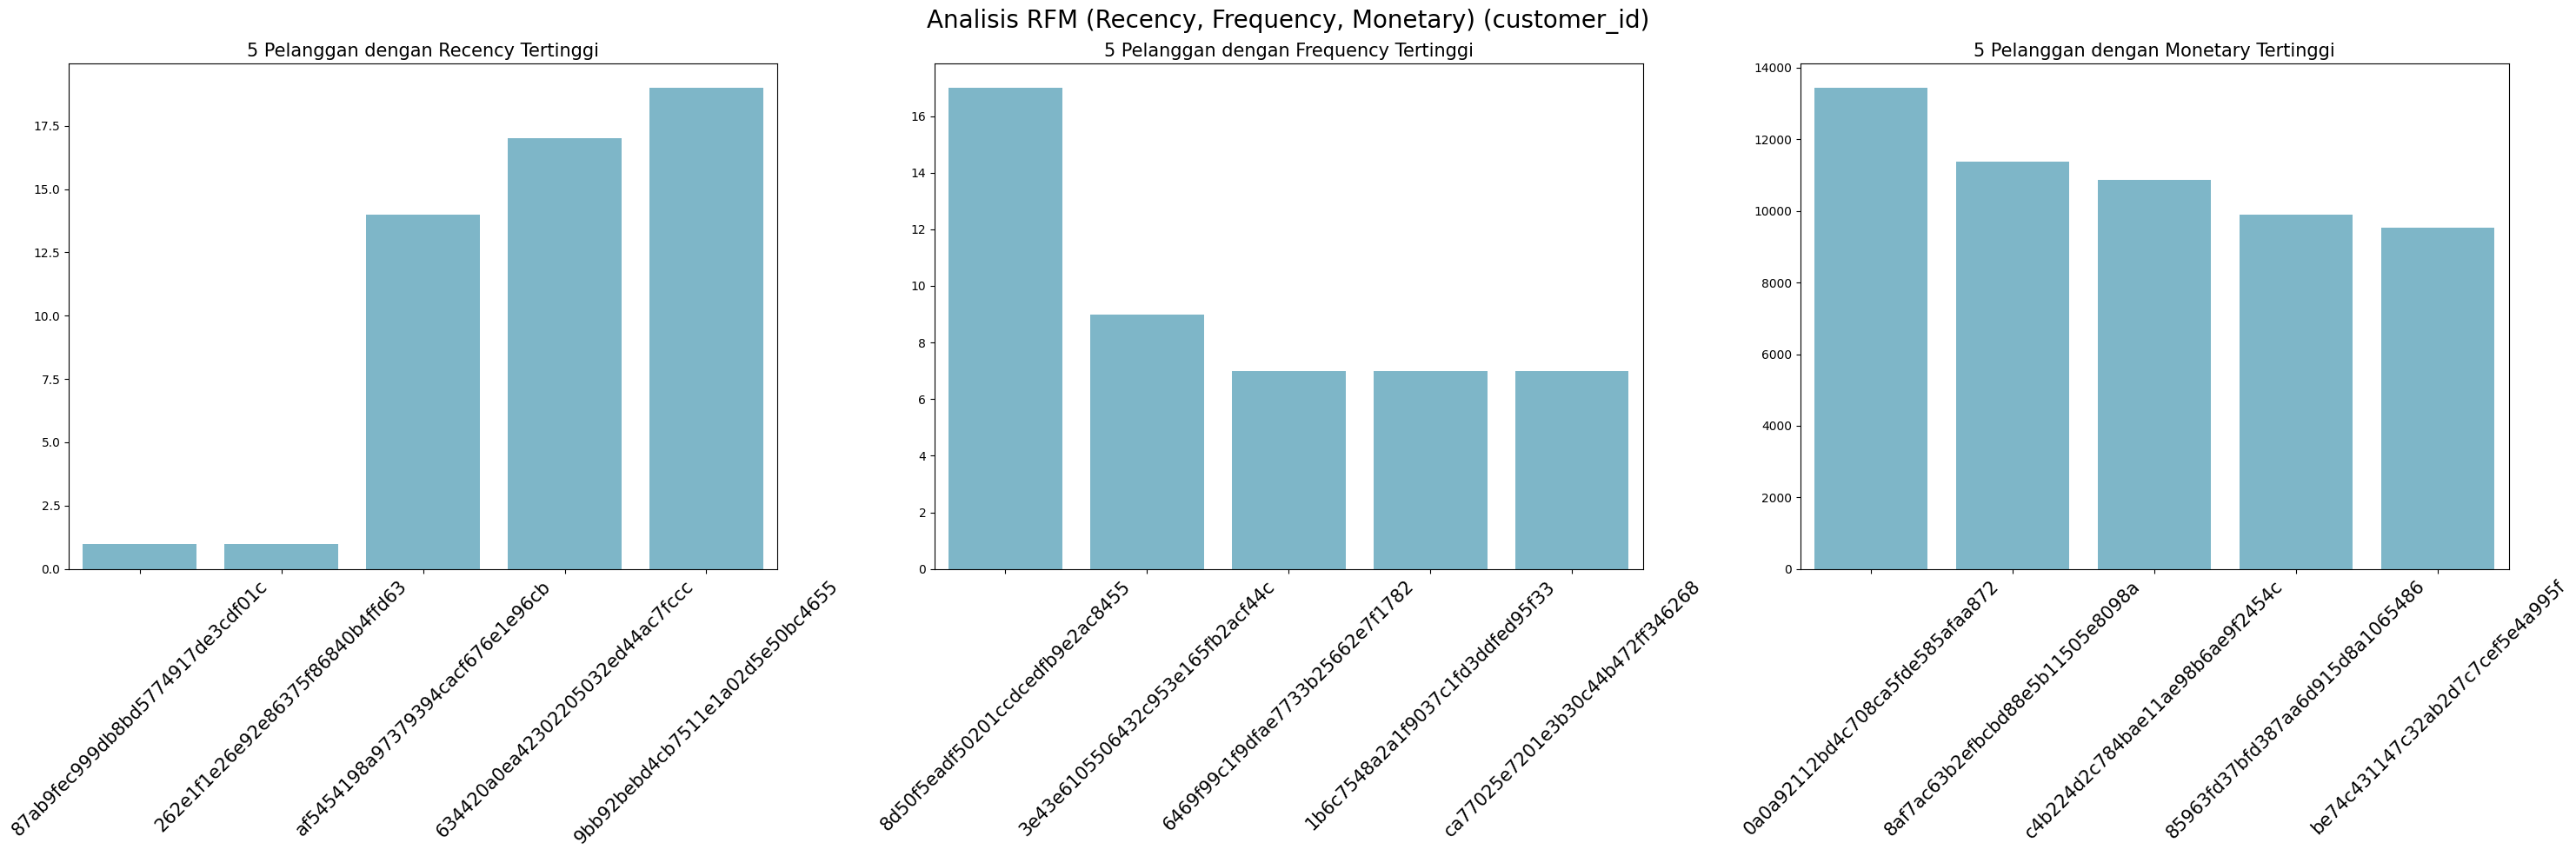

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

#Untuk plot recency
sns.barplot(
    x="customer_id",
    y="recency",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("5 Pelanggan dengan Recency Tertinggi", loc="center", fontsize=15)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)

#Untuk plot frequency
sns.barplot(
    x="customer_id",
    y="frequency",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_title("5 Pelanggan dengan Frequency Tertinggi", loc="center", fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

#Untuk plot monetary
sns.barplot(
    x="customer_id",
    y="monetary",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2]
)
ax[2].set_title("5 Pelanggan dengan Monetary Tertinggi", loc="center", fontsize=15)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Analisis RFM (Recency, Frequency, Monetary) (customer_id)", fontsize=20)
plt.tight_layout()
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, dan monetary score

In [146]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,recency,frequency,monetary,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,73191.5,46550.0,64043.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,72185.5,46550.0,4722.5
2,0000f46a3911fa3c0805444483337064,586,1,69.00,3567.0,46550.0,37550.5
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,27886.5,46550.0,9987.0
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,32754.0,46550.0,76400.0


In [147]:
#normalisasi rank customer
rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100
rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100
rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,76.165377,48.441142,66.644814
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,75.118502,48.441142,4.914356
2,0000f46a3911fa3c0805444483337064,586,1,69.00,3.711932,48.441142,39.076028
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,29.019569,48.441142,10.392732
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,34.084843,48.441142,79.503830


In [148]:
#bobot: R=15%, F=28%, M=57%
rfm_df['RFM_score'] = (0.15 * rfm_df['r_rank_norm']) + (0.28 * rfm_df['f_rank_norm']) + (0.57 * rfm_df['m_rank_norm'])

#skalasi ke 1-5 dan pembulatan
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)

print(rfm_df[['customer_id', 'RFM_score']].head(10))

                        customer_id  RFM_score
0  0000366f3b9a7992bf8c76cfdf3221e2       3.15
1  0000b849f77a49e4a4ce2b2a4ca5be3f       1.38
2  0000f46a3911fa3c0805444483337064       1.82
3  0000f6ccb0745a6a4b88665a16c9f078       1.19
4  0004aac84e0df4da2b147fca70cf8255       3.20
5  0004bd2a26a76fe21f786e4fbd80607f       3.29
6  00050ab1314c0e55a6ca13cf7181fecf       1.54
7  00053a61a98854899e70ed204dd4bafe       3.78
8  0005e1862207bf6ccc02e4228effd9a0       2.65
9  0005ef4cd20d2893f0d9fbd94d3c0d97       2.77


#### Segmentasi customer berdasarkan RFM score

In [149]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.15,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.38,lost customers
2,0000f46a3911fa3c0805444483337064,1.82,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.19,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.20,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.29,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.54,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.78,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.65,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.77,Low value customers


In [150]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,2625
1,Low value customers,46477
2,Medium value customer,28119
3,Top customers,519
4,lost customers,18356


In [151]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

#### Visualisasi segmen pelanggan

/tmp/ipython-input-395/764005905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


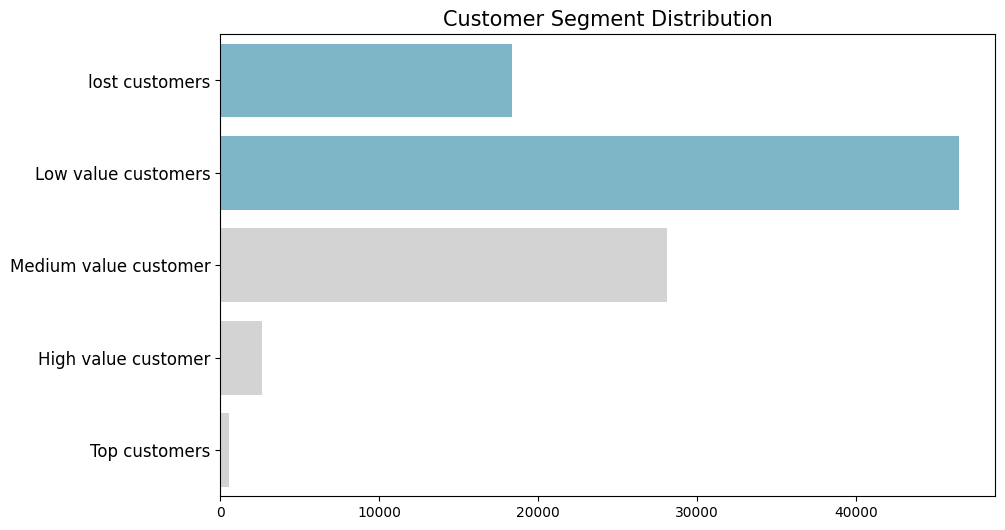

In [152]:
plt.figure(figsize=(10, 6))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_segment",
    x="customer_id",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
)

plt.title("Customer Segment Distribution", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan dari hasil visualisasi tersebut, melalui metode RFM Analysis ini berhasil mengidentifikasi loyalitas dan nilai ekonomi pelanggan ke dalam lima segmen strategis mulai dari `Top customers` hingga `Lost customers`. Namun sayangnya, hasil visualisasi tersebut banyak para customers yang `Low value customers`, sehingga perlunya pengkajian lagi terkait strategi pemasaran.

## Conclusion

- Conclution pertanyaan 1 : Performa bisnis menunjukkan pertumbuhan yang baik dengan puncak transaksi tertinggi terjadi pada bulan November tahun 2017. Tren ini secara keseluruhan menunjukkan korelasi positif antara banyaknya pesanan dan total pendapatan perusahaan.

- Conclution pertanyaan 2 : Pada kategori security_and_service diidentifikasi memiliki tingkat kepuasan terendah dengan skor rata-rata 2,5 yang jauh dibawah standar kategori lainnya. Hal ini perlu adanya audit lebih lagi pada kualitas produk serta efisiensi pengiriman khususnya kategori tersebut guna meningkatkan tingkat kepuasan pelanggan.

- Conclution pertanyaan 3 : Negara bagian Sao Paulo (SP) menjadi basis pasar utama dengan jumlah pelanggan mencapai 39.981 orang dan berkontribusi sebesar 38,28% terhadap total pendapatan. Hal ini didasari oleh strategi operasional dan logistik perusahaan yang baik di pusat ekonomi utama tersebut.

- Conclution pertanyaan 4 : Performa produk terdapat perbedaan karakteristik antara produk yang paling menguntungkan dan juga yang paling laku, yang dimana health_beauty menduduki total pendapatan terbanyak, sedangkan bed_bath_table menduduki total jumlah unit terjual yang terbanyak. Mungkin dengan strategi stok barang dan pemasaran harus lebih disesuaikan dengan profil masing-masing kategori guna meningkatkan performa produk.

- Conclution (RFM Analysis untuk segmentasi pelanggan) : Melalui metode RFM Analysis ini berhasil memetakan profil pelanggan ke dalam lima segmen mulai dari Top hingga Lost Customers berdasarkan perilaku dari belanja mereka. Hal ini dapat memungkinkan perusahaan dalam menjalankan strategi pemasaran yang lebih personal, seperti memberikan apresiasi pada segmen Top dan melakukan re-aktivasi pengenalan atau penjelasan produk yang rapi bagi pelanggan di segmen bawah.

In [153]:
# # Codingan Dashboard Streamlit
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import streamlit as st
# from babel.numbers import format_currency

# sns.set(style='dark')

# # 1. Helper Functions
# def create_daily_orders_df(df):
#     daily_orders_df = df.resample(rule='D', on='order_purchase_timestamp').agg({
#         "order_id": "nunique",
#         "price": "sum"
#     }).reset_index()
#     daily_orders_df.rename(columns={
#         "order_id": "order_count",
#         "price": "revenue"
#     }, inplace=True)
#     return daily_orders_df

# def create_bycategory_review_df(df):
#     category_review_df = df.groupby("product_category_name_english").review_score.mean().sort_values(ascending=True).reset_index()
#     return category_review_df

# def create_bystate_df(df):
#     bystate_df = df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
#     bystate_df.rename(columns={
#         "customer_unique_id": "customer_count"
#     }, inplace=True)
#     return bystate_df

# def create_product_performance_df(df):
#     product_performance_df = df.groupby("product_category_name_english").agg({
#         "order_id": "nunique",
#         "price": "sum"
#     }).reset_index()
#     product_performance_df.rename(columns={
#         "order_id": "quantity",
#         "price": "revenue"
#     }, inplace=True)
#     return product_performance_df

# def create_rfm_df(df):
#     snapshot_date = df['order_purchase_timestamp'].max() + pd.DateOffset(days=1)
#     rfm_df = df.groupby('customer_unique_id').agg({
#         'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
#         'order_id': 'nunique',
#         'price': 'sum'
#     }).reset_index()
#     rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']

#     rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
#     rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
#     rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

#     rfm_df['RFM_score'] = (0.15 * (rfm_df['r_rank']/rfm_df['r_rank'].max())*100) + \
#                           (0.28 * (rfm_df['f_rank']/rfm_df['f_rank'].max())*100) + \
#                           (0.57 * (rfm_df['m_rank']/rfm_df['m_rank'].max())*100)
#     rfm_df['RFM_score'] *= 0.05
#     rfm_df = rfm_df.round(2)
#     return rfm_df

# # 2. Load Data
# all_df = pd.read_csv("all_data.csv")

# datetime_columns = ["order_purchase_timestamp"]
# for column in datetime_columns:
#     all_df[column] = pd.to_datetime(all_df[column])

# all_df.sort_values(by="order_purchase_timestamp", inplace=True)
# all_df.reset_index(inplace=True)

# # 3. Sidebar Filter
# min_date = all_df["order_purchase_timestamp"].min()
# max_date = all_df["order_purchase_timestamp"].max()

# with st.sidebar:
#     st.title("E-Commerce Dashboard")
#     # Ganti URL logo jika perlu
#     st.image("https://github.com/dicodingacademy/assets/raw/main/logo.png")

#     start_date, end_date = st.date_input(
#         label='Rentang Waktu',
#         min_value=min_date,
#         max_value=max_date,
#         value=[min_date, max_date]
#     )
# main_df = all_df[(all_df["order_purchase_timestamp"] >= str(start_date)) &
#                  (all_df["order_purchase_timestamp"] <= str(end_date))]

# daily_orders_df = create_daily_orders_df(main_df)
# category_review_df = create_bycategory_review_df(main_df)
# bystate_df = create_bystate_df(main_df)
# product_performance_df = create_product_performance_df(main_df)
# rfm_df = create_rfm_df(main_df)

# # 4. Main Dashboard
# st.header('E-Commerce Performance Dashboard :sparkles:')

# # Pertanyaan 1
# st.subheader('Daily Orders & Revenue')
# col1, col2 = st.columns(2)
# with col1:
#     st.metric("Total Orders", value=daily_orders_df.order_count.sum())
# with col2:
#     total_rev = format_currency(daily_orders_df.revenue.sum(), "BRL", locale='pt_BR')
#     st.metric("Total Revenue", value=total_rev)

# fig, ax = plt.subplots(figsize=(16, 8))
# ax.plot(daily_orders_df["order_purchase_timestamp"], daily_orders_df["order_count"], marker='o', linewidth=2, color="#90CAF9")
# st.pyplot(fig)

# # Pertanyaan 2 dan 4
# st.subheader("Product Category Performance")
# tab1, tab2 = st.tabs(["Review Score", "Sales Performance"])

# with tab1:
#     st.write("Kategori dengan Kepuasan Terendah")
#     fig, ax = plt.subplots(figsize=(12, 6))
#     sns.barplot(x="review_score", y="product_category_name_english", data=category_review_df.head(10), palette="Reds_r")
#     st.pyplot(fig)

# with tab2:
#     col1, col2 = st.columns(2)
#     with col1:
#         st.write("Top 5 by Revenue")
#         fig, ax = plt.subplots(figsize=(10, 5))
#         sns.barplot(x="revenue", y="product_category_name_english", data=product_perf_df.sort_values("revenue", ascending=False).head(5), palette="Blues_r")
#         st.pyplot(fig)
#     with col2:
#         st.write("Top 5 by Quantity")
#         fig, ax = plt.subplots(figsize=(10, 5))
#         sns.barplot(x="quantity", y="product_category_name_english", data=product_perf_df.sort_values("quantity", ascending=False).head(5), palette="GnBu_r")
#         st.pyplot(fig)

# # Pertanyaan 3
# st.subheader("Customer Geographics")
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.barplot(x="customer_count", y="customer_state", data=bystate_df.sort_values("customer_count", ascending=False).head(10), palette="viridis")
# st.pyplot(fig)

# # RFM Analysis
# st.subheader("Best Customer Based on RFM Parameters")
# col1, col2, col3 = st.columns(3)
# with col1:
#     st.metric("Avg Recency (days)", value=round(rfm_df.recency.mean(), 1))
# with col2:
#     st.metric("Avg Frequency", value=round(rfm_df.frequency.mean(), 2))
# with col3:
#     st.metric("Avg Monetary", value=format_currency(rfm_df.monetary.mean(), "BRL", locale='pt_BR'))

# # Visualisasi Top 5 Customers per RFM
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
# sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values("recency", ascending=True).head(5), ax=ax[0])
# ax[0].set_title("By Recency", fontsize=30)
# sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values("frequency", ascending=False).head(5), ax=ax[1])
# ax[1].set_title("By Frequency", fontsize=30)
# sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values("monetary", ascending=False).head(5), ax=ax[2])
# ax[2].set_title("By Monetary", fontsize=30)
# st.pyplot(fig)

# st.caption('Copyright © Nurya Dashboard 2026')